In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


In [4]:
n_train=20 #samples for training
n_test=200 # samples for testing
n_averages=50 # how often to repeat classification
n_features_max=75 # max number of features
step=4 # step size for calculation

In [5]:
def generate_data(n_samples,n_features):
    X,y=make_blobs(n_samples=n_samples,n_features=1,centers=[[-2],[2]])
    if n_features>1:
        X=np.hstack([X,np.random.randn(n_samples,n_features-1)])
    return X,y

In [7]:
acc_clf1,acc_clf2=[],[]
n_features_range=range(1,n_features_max+1,step)
for n_features in n_features_range:
    score_clf1,score_clf2=0,0
    for _ in range(n_averages):
        X,y = generate_data(n_train,n_features)
        clf1= LinearDiscriminantAnalysis(solver='lsqr',shrinkage='auto').fit(X,y)
        clf2= LinearDiscriminantAnalysis(solver='lsqr',shrinkage=None).fit(X,y)
        X,y = generate_data(n_test,n_features)
        
        score_clf1 += clf1.score(X,y)
        score_clf2 += clf2.score(X,y)
        
    acc_clf1.append(score_clf1/n_averages)
    acc_clf2.append(score_clf2/n_averages)

In [8]:
features_samples_ratio = np.array(n_features_range)/n_train

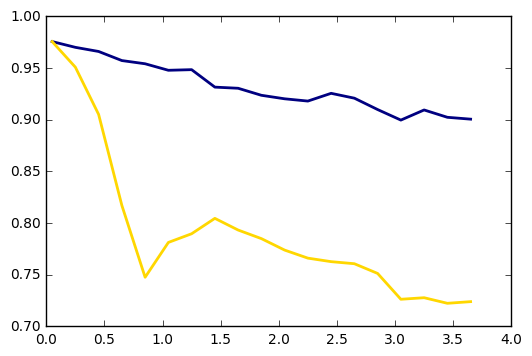

In [9]:
plt.plot(features_samples_ratio,acc_clf1,linewidth=2,label="LDA with shrinkage",color='navy')
plt.plot(features_samples_ratio,acc_clf2,linewidth=2,label="LDA without shrinkage",color='gold')
plt.show()